In [1]:
## Load libraries
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

C:\Users\adity\AppData\Local\Temp\ipykernel_12340\1680757352.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
# ## Mount Google drive folder if running in Colab
# if('google.colab' in sys.modules):
#     from google.colab import drive
#     drive.mount('/content/drive', force_remount = True)
#     DIR = '/content/drive/MyDrive/Colab Notebooks/MAHE/MSIS Coursework/OddSem2023MAHE'
#     DATA_DIR = DIR + '/Data/'
# else:
#     DATA_DIR = 'Data/'

Mounted at /content/drive


**Problem-1**: we will reconstruct missing values in a real ECG signal. To that end, first load the ECG signal data and make a component plot of the loaded ECG vector by executing the cell below. Note the missing values:

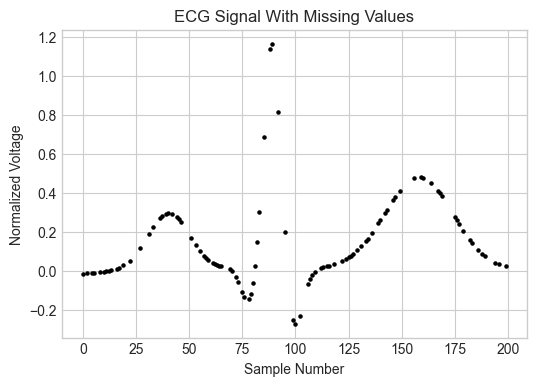

In [2]:
## Load data
FILE = 'ecg_missing.txt'
df_ecg = pd.read_csv(FILE, header = None, names = ['ecgvalues'])
df_ecg['ecgvalues'] = df_ecg['ecgvalues'].astype(float)

## Component plot of the ecg signal
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
component_index = range(0, len(df_ecg['ecgvalues']))
ax.scatter(component_index, df_ecg['ecgvalues'], color = 'black', marker = 'o', s = 5)
ax.set_xlabel('Sample Number')
ax.set_ylabel('Normalized Voltage')
ax.set_title('ECG Signal With Missing Values');

**Problem-1.1**: extract the indices corresponding to the missing ECG values

In [3]:
indices_unknown = df_ecg[df_ecg['ecgvalues'].isna()].index #or use isnull()
indices_unknown

Int64Index([  1,   3,   6,   7,   9,  14,  15,  18,  20,  21,  23,  24,  25,
             26,  28,  29,  30,  32,  34,  35,  38,  41,  43,  47,  48,  49,
             50,  52,  54,  56,  60,  66,  67,  68,  71,  74,  77,  84,  86,
             87,  90,  91,  93,  94,  96,  97,  98, 101, 103, 104, 105, 110,
            111, 114, 117, 119, 120, 121, 123, 128, 130, 132, 135, 137, 138,
            141, 144, 145, 148, 150, 151, 152, 153, 154, 155, 157, 158, 161,
            162, 163, 165, 166, 170, 171, 172, 173, 174, 178, 180, 181, 184,
            185, 187, 190, 191, 192, 193, 195, 197, 198],
           dtype='int64')

**Problem-1.2**: extract the indices corresponding to the known ECG values

In [4]:
indices_known = df_ecg[df_ecg['ecgvalues'].notna()].index

**Problem-1.3**: build a vector of known ecg signal values

In [5]:
x_known = np.array(df_ecg.loc[indices_known, 'ecgvalues'])
x_known

array([-1.4374358e-02, -1.2637355e-02, -1.0812403e-02, -9.8533655e-03,
       -6.5482859e-03, -3.7513235e-03, -2.0578644e-03, -9.4258541e-05,
        2.2061528e-03,  1.1933259e-02,  1.6432082e-02,  2.7900408e-02,
        5.2836413e-02,  1.1955439e-01,  1.8927629e-01,  2.2432987e-01,
        2.6819605e-01,  2.7884396e-01,  2.9247613e-01,  2.9511999e-01,
        2.9169886e-01,  2.7691699e-01,  2.6566740e-01,  2.5236573e-01,
        1.6913212e-01,  1.3481272e-01,  1.0374964e-01,  7.7566183e-02,
        6.6488692e-02,  5.6786325e-02,  4.1356533e-02,  3.5450843e-02,
        3.0563746e-02,  2.6503058e-02,  2.3035374e-02,  7.1758438e-03,
       -1.8258006e-03, -3.2324290e-02, -5.4580566e-02, -1.0887994e-01,
       -1.3214744e-01, -1.4281210e-01, -1.1800725e-01, -6.4454915e-02,
        2.2472551e-02,  1.4558586e-01,  3.0343132e-01,  6.8578156e-01,
        1.1362935e+00,  1.1638875e+00,  8.1561486e-01,  2.0040482e-01,
       -2.4972163e-01, -2.6991059e-01, -2.3291409e-01, -6.9188851e-02,
      

**Probem-1.4**: construct the matrices $S_1$ and $S_2.$

In [6]:
I = np.eye(len(df_ecg))
S1 = I[:,indices_known]
S2 = I[:,indices_unknown]
S1

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

**Problem-1.5**: build the matrix $D$

In [8]:
n = len(df_ecg) # size of the signal
#n=6
a = 1*np.ones(n-1)
b = -2*np.ones(n)
D = np.diag(a, -1) + np.diag(b,0) + np.diag(a,1) # np.diag(a,1) means put elements of a in 1st diagonal similarly np.diag(a, -1) means put elements in -1 diagonal and 
#np.diag(b,0) means put elements of b on diagonal 0(the normal diagonal)
D = D[1:n-1, :] #we dont want 1st and last row
D

array([[ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.]])

Reconstruct the missing values such that the resulting ECG signal is smooth (we will do this part during the lab session).

In [19]:
A = np.dot(D, S2)
b = -(np.dot(D, np.dot(S1, x_known)))
x_unknown = np.linalg.lstsq(A, b)[0]
df_ecg['ecgvalues'].values[indices_unknown] = x_unknown

C:\Users\adity\AppData\Local\Temp\ipykernel_12340\1655666192.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_unknown = np.linalg.lstsq(A, b)[0]


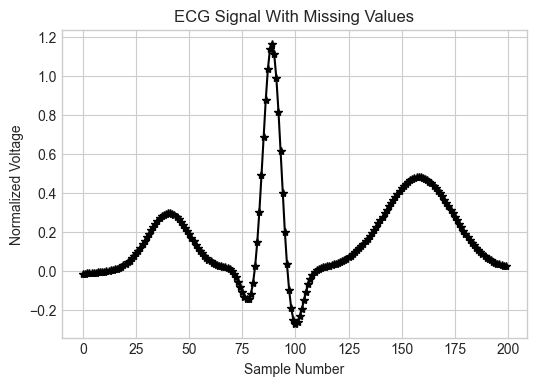

In [20]:

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
component_index = range(0, len(df_ecg['ecgvalues']))
ax.plot(component_index, df_ecg['ecgvalues'], color='black', linestyle='-',marker = "*")  
ax.set_xlabel('Sample Number')
ax.set_ylabel('Normalized Voltage')
ax.set_title('ECG Signal With Missing Values')
plt.show()

**Problem-2**: consider an $n$-vector $x$ of time series values. The following code snippet simulates such as vector. Try three different cycle frequency values (0.5, 1.0, 2.0) in the variable f below and observe what happens to the component plot of the vector.

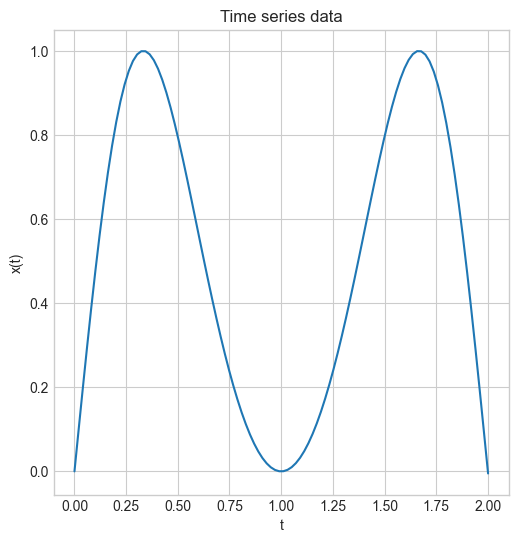

In [ ]:
t_start = 0 # start time in sec
t_end = 2 # end time in sec
t = np.linspace(t_start, t_end+1e-03, 100) # timestamps
f = 0.5   # cycle frequency
omega = 2 * np.pi * f # angular frequency
x = np.sin(omega*np.sin(0.5*omega*t))
fig, ax2 = plt.subplots(1, 1, figsize = (6, 6))
fig.tight_layout(pad = 4.0)
ax2.plot(t, x,)
ax2.set_xlabel('t')
ax2.set_ylabel('x(t)')
ax2.set_title('Time series data');

**Problem 2.1**: In order to measure how rough or wiggly a signal represented by a vector is, we measure the so called *Dirichlet energy* of the signal which for the vector $x$ we saw above is defined as:

$$(x_2-x_1)^2+(x_3-x_2)^2+\cdots+(x_{100}-x_{99})^2.$$

Calculate the Dirichlet energy of the vector $x$ for the three different frequency values mentioned above. How do the values compare to each other?

Use the following clue:

Dirichlet energy of $x = \lVert Dx\lVert_2^2,$ where $D$ is the matrix $$\begin{bmatrix}-1 & ? & ? &\cdots&?&?\\0 & ? & 1 &\cdots&?&?\\? & ? & ? &\cdots&?&?\\ &  & \vdots &\vdots&&\\? & ? & ? &\cdots&-1&?\end{bmatrix}.$$

In [ ]:
n = 100 # size of the signal
a = -1*np.ones(n-1)
c= 1*np.ones(n-1)
D = np.diag(a, -1)+ np.diag(c,1)
f = 0.5  
omega = 2* np.pi * f
x = np.sin(omega*np.sin(0.5*omega*t))
l2= np.linalg.norm(np.dot(D, x))
dirichlet_energy = l2 ** 2
dirichlet_energy

0.8961571430273149